<a href="https://colab.research.google.com/github/alanmoralesrz/FIME-IB-projects/blob/main/Procesamiento_digital_de_se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Muestreo de Señal Senoidal**

[ 0.00000000e+00  2.59807621e+00  2.59807621e+00  3.67394040e-16
 -2.59807621e+00 -2.59807621e+00 -7.34788079e-16  2.59807621e+00
  2.59807621e+00]


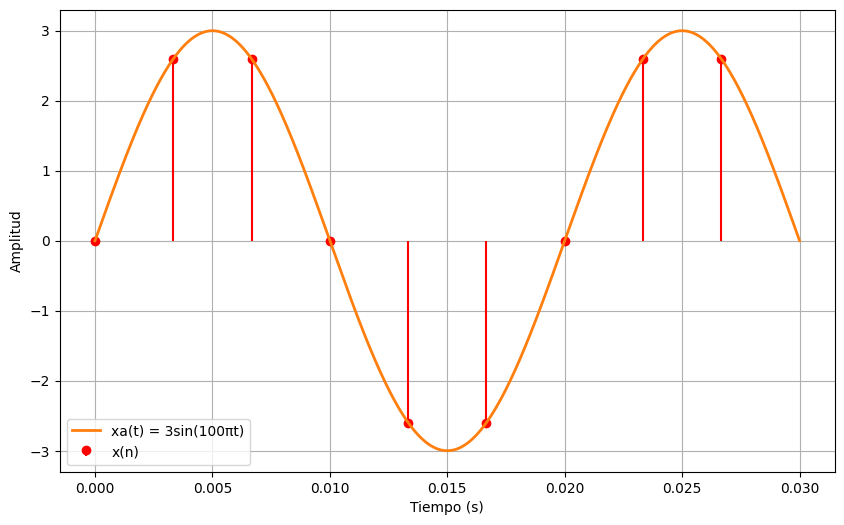

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t_cont = np.arange(0, 0.03, 0.000001) #de 0 a 0.03s aumentando 1microseg
xa_t = 3 * np.sin(100 * np.pi * t_cont)

T = 1/300
t_disc = np.arange(0, 0.03, T) # de 0 a 0.03s aumentando cada 1/300s
x_n = 3 * np.sin(100 * np.pi * t_disc)
print(x_n)

# Gráfica de la señal
plt.figure(figsize=(10, 6))
plt.stem(t_disc, x_n, basefmt=' ', markerfmt='ro', linefmt='r-', label='x(n)')
plt.plot(t_cont, xa_t, label='xa(t) = 3sin(100πt)', linewidth=2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# **Señal sinusoidal asialing**

La señal muestreada se describe mediante la fórmula siguiente:  xa(nT) = sen2π(F0/Fs) n, −∞ < n < ∞ donde Fs = 1/T es la frecuencia de muestreo.



a) Represente gráficamente la señal x(n), 0 ≤ n ≤ 99 para Fs = 5 kHz y F0 = 0.5, 2, 3 y 4.5 kHz.


b) Suponga que F0 = 2 kHz y Fs = 50 kHz.
1. Represente gráficamente la señal x(n). ¿Cuál es la frecuencia f0 de la señal x(n)?
2. Represente gráficamente la señal y(n) obtenida tomando las muestras pares de x(n).

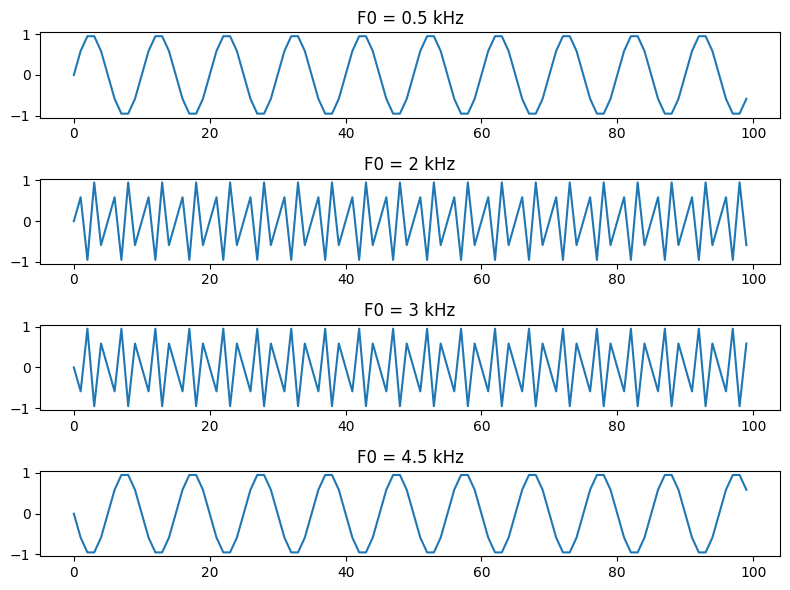

In [ ]:
#INCISO (A)
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(0, 100)
Fs = 5000

# Para F0 = 0.5 kHz
F0_1 = 500
x1 = np.sin(2 * np.pi * F0_1 / Fs * n)

# Para F0 = 2 kHz
F0_2 = 2000
x2 = np.sin(2 * np.pi * F0_2 / Fs * n)

# Para F0 = 3 kHz
F0_3 = 3000
x3 = np.sin(2 * np.pi * F0_3 / Fs * n)

# Para F0 = 4.5 kHz
F0_4 = 4500
x4 = np.sin(2 * np.pi * F0_4 / Fs * n)

plt.figure(figsize=(8, 6))

plt.subplot(4, 1, 1)
plt.plot(n, x1)
plt.title('F0 = 0.5 kHz')

plt.subplot(4, 1, 2)
plt.plot(n, x2)
plt.title('F0 = 2 kHz')

plt.subplot(4, 1, 3)
plt.plot(n, x3)
plt.title('F0 = 3 kHz')

plt.subplot(4, 1, 4)
plt.plot(n, x4)
plt.title('F0 = 4.5 kHz')

plt.tight_layout()
plt.show()

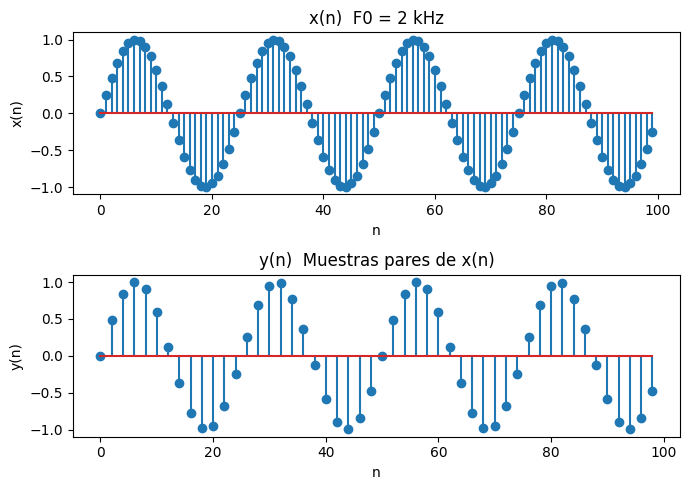

In [ ]:
#INCISO (B)
n = np.arange(0, 100)
Fs = 50  # kHz
F0 = 2   # kHz
x = np.sin(2 * np.pi * (F0 / Fs) * n)

# Obtener las muestras pares
y = x[::2]

plt.figure(figsize=(7, 5))

plt.subplot(2, 1, 1)
plt.stem(n, x)
plt.title('x(n)  F0 = 2 kHz')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.subplot(2, 1, 2)
plt.stem(n[::2], y)
plt.title('y(n)  Muestras pares de x(n)')
plt.xlabel('n')
plt.ylabel('y(n)')

plt.tight_layout()
plt.show()

# **Error de cuantificacion en la conversion A/D**

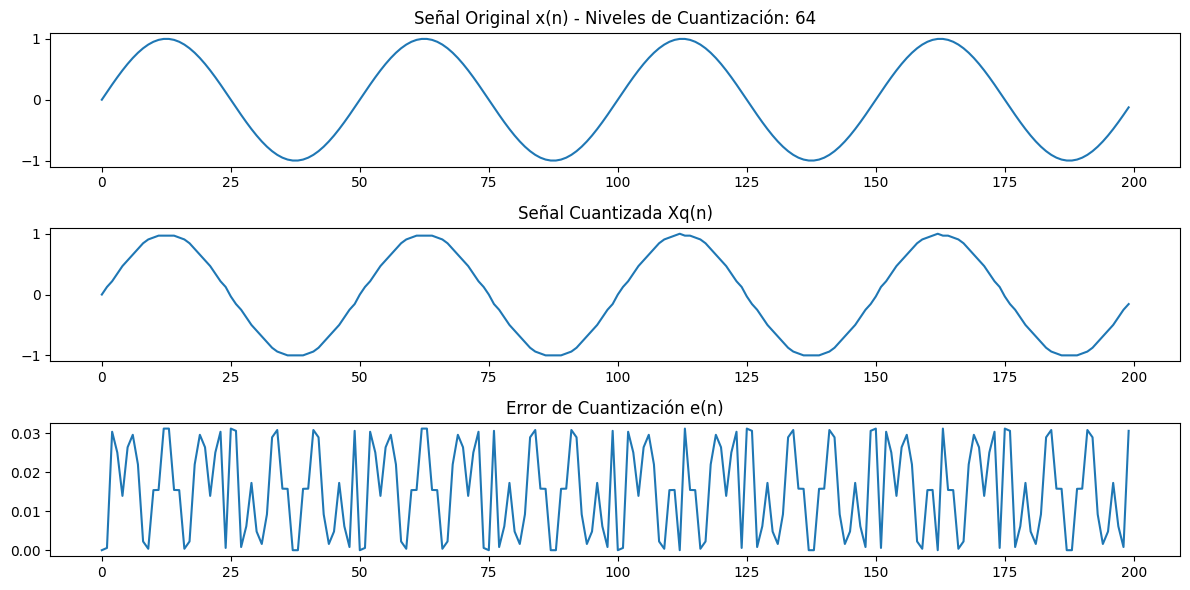

Niveles de Cuantización: 64
SQNR: 31.35 dB


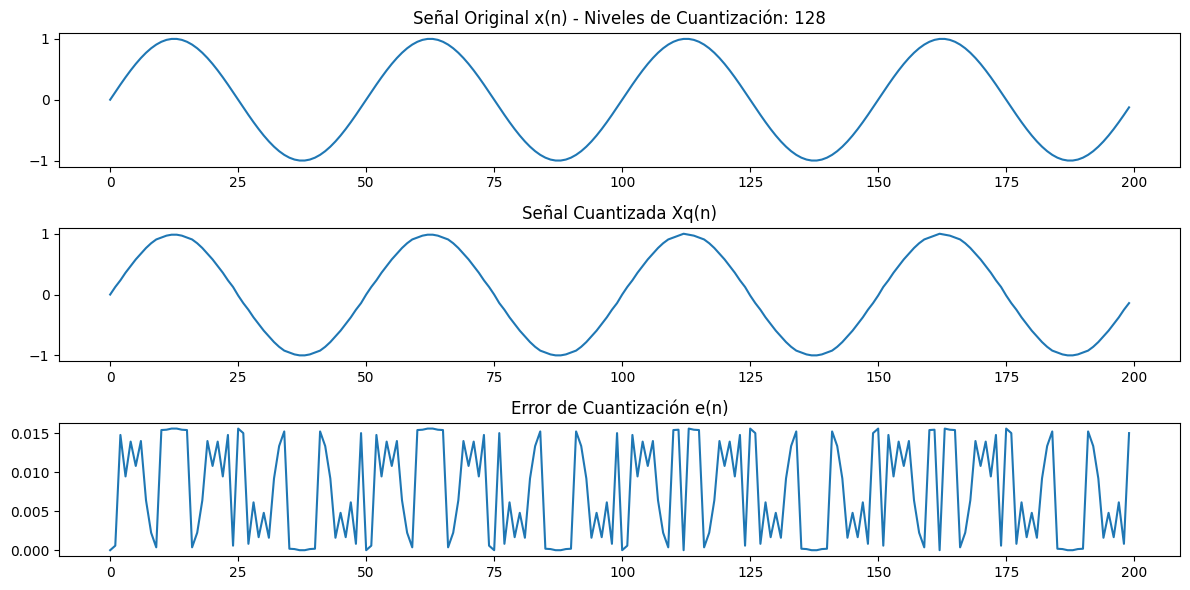

Niveles de Cuantización: 128
SQNR: 37.12 dB


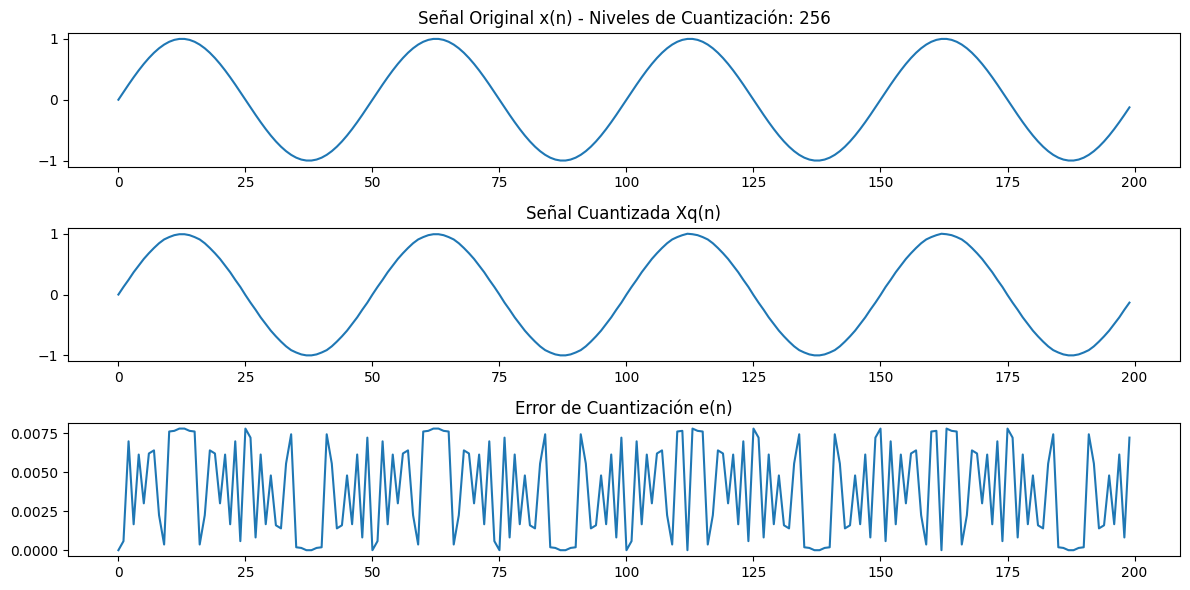

Niveles de Cuantización: 256
SQNR: 43.32 dB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
f0 = 1/50
N = 200
n = np.arange(N)
x_n = np.sin(2 * np.pi * f0 * n)  # Señal original x(n)
Px = np.mean(x_n**2)  # Potencia de la señal original

def quantize_signal(signal, levels, method='truncation'):
    max_value = np.max(signal)
    min_value = np.min(signal)
    step_size = (max_value - min_value) / levels

    if method == 'truncation':
        quantized_signal = np.floor((signal - min_value) / step_size) * step_size + min_value
    elif method == 'rounding':
        quantized_signal = np.round((signal - min_value) / step_size) * step_size + min_value
    else:
        raise ValueError("Método de cuantización no válido")

    return quantized_signal

quantization_levels = [64, 128, 256]

for levels in quantization_levels:
    # Cuantizar la señal
    quantized_signal = quantize_signal(x_n, levels, method='truncation')

    # Calcular el error de cuantización
    error_signal = x_n - quantized_signal
    Pq = np.mean(error_signal**2)  # Potencia de error de cuantización
    SQNR = 10 * np.log10(Px / Pq)  # Relación señal-ruido de cuantificación

    # Gráficos
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(n, x_n)
    plt.title(f'Señal Original x(n) - Niveles de Cuantización: {levels}')
    plt.subplot(3, 1, 2)
    plt.plot(n, quantized_signal)
    plt.title('Señal Cuantizada Xq(n)')
    plt.subplot(3, 1, 3)
    plt.plot(n, error_signal)
    plt.title('Error de Cuantización e(n)')
    plt.tight_layout()
    plt.show()

    print(f'Niveles de Cuantización: {levels}')
    print(f'SQNR: {SQNR:.2f} dB')

# **Electrocardiograma**

In [ ]:
!pip install neurokit2

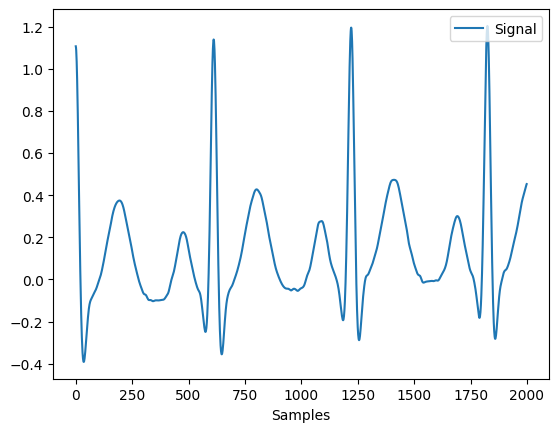

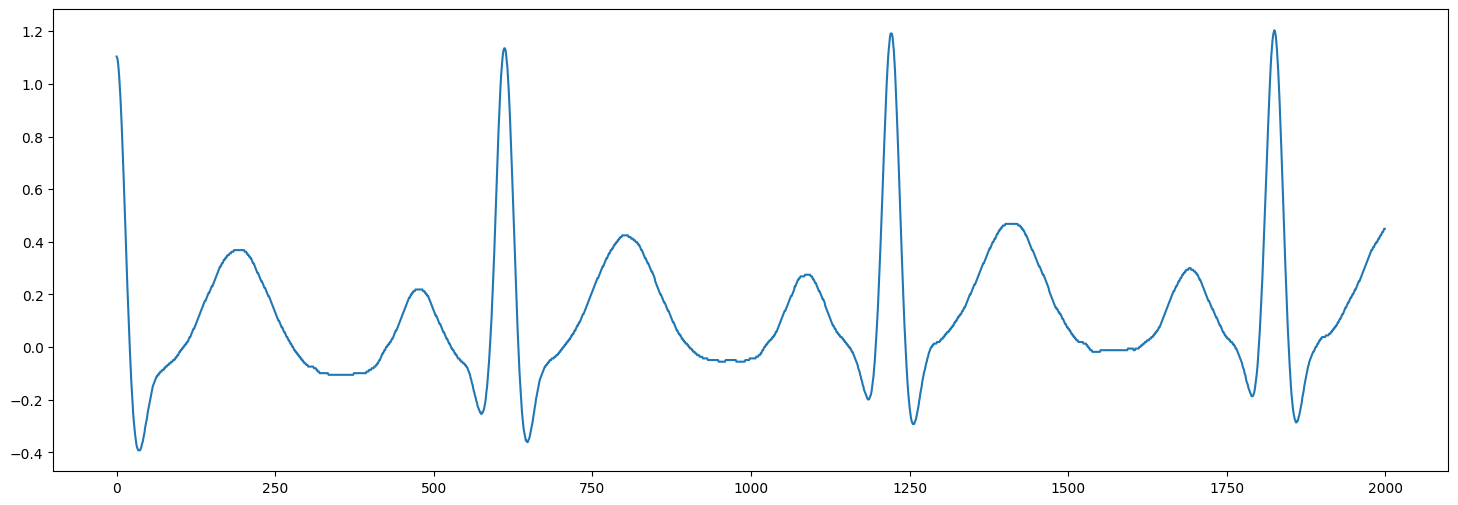

In [ ]:
import neurokit2 as nk  # Load the package

simulated_ecg = nk.ecg_simulate(duration=2, sampling_rate=1000, heart_rate=100)

nk.signal_plot(simulated_ecg)  # Visualize the signal
xn = quantize_signal(simulated_ecg, 256, "truncation")
plt.figure(figsize=(18,6))
plt.plot(xn)

In [ ]:
xe  = 0.5 * (xn + np.flip(xn))#x(n)parte par
xo  = 0.5 * (xn - np.flip(xn))#x(n-1)parte impar
x = xe - xo #y(n)= x(n) - x(n-1)

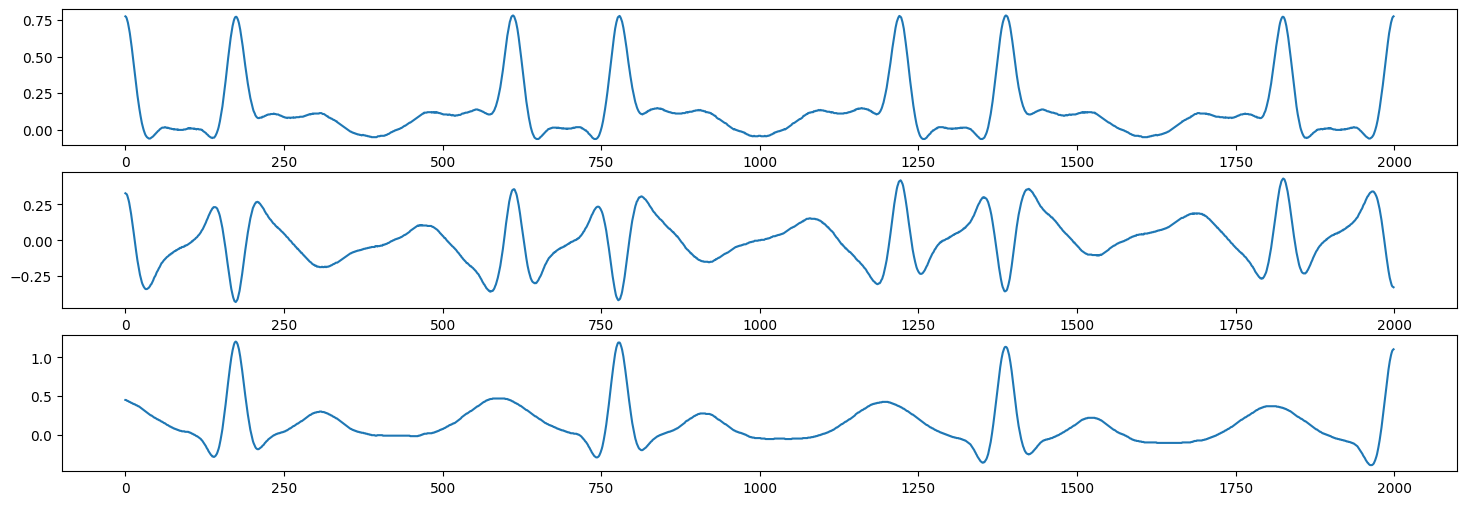

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(3,1,1)
plt.plot(xe)
plt.subplot(3,1,2)
plt.plot(xo)
plt.subplot(3,1,3)
plt.plot(x)

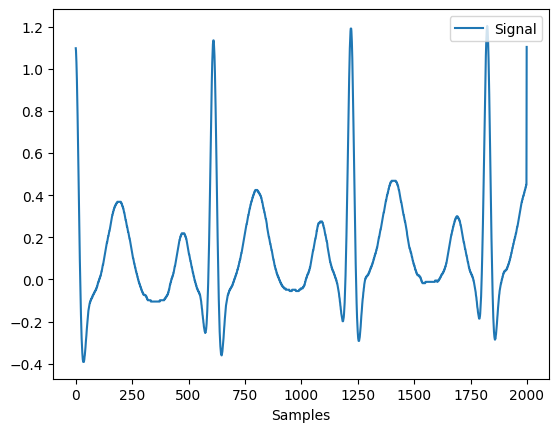

In [ ]:
xn1= np.roll(xn,-1)
nk.signal_plot(xn1)

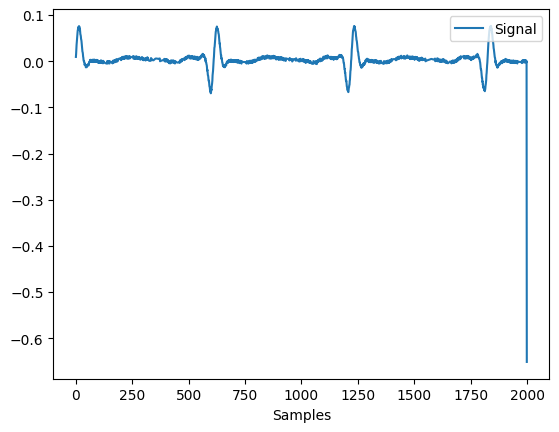

In [ ]:
y = simulated_ecg - xn1
nk.signal_plot(y)

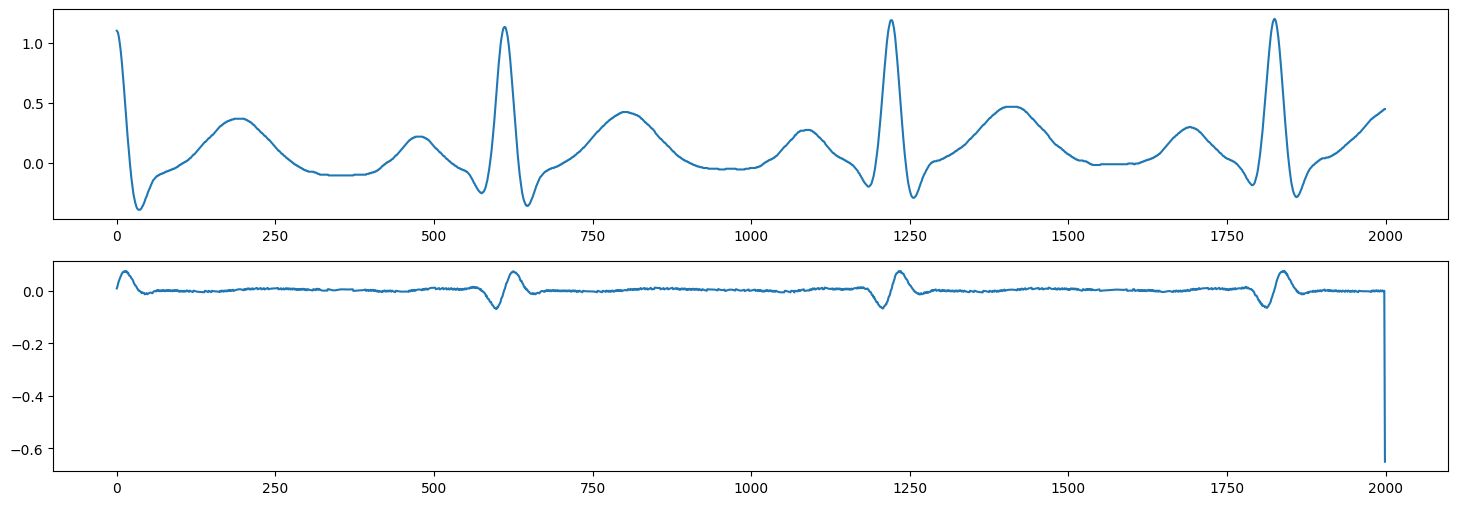

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot(xn)
plt.subplot(2,1,2)
plt.plot(y)